<a href="https://colab.research.google.com/github/M0hammad-Kashif/SketchToFace/blob/main/sketch_to_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!echo '{"username":"mohammadkashif20","key":"029e913c85378ab69c8d83b71b3f3bcc"}' >> kaggle.json

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d yewtsing/pretty-face

import zipfile
with zipfile.ZipFile("/content/pretty-face.zip","r") as zip_ref:
    zip_ref.extractall("Dataset")

    

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from PIL import Image

In [ ]:
face_path = '/content/Dataset/face/face'
sketch_path = '/content/Dataset/sketch/sketch'

face_file = os.listdir(face_path)
sketch_file = os.listdir(sketch_path)
print(len(face_file))
print(len(sketch_file))

3318
3318


(512, 512, 3)
(512, 512, 3)


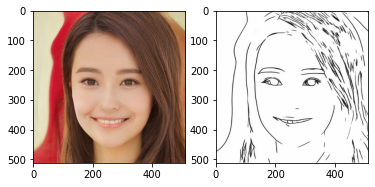

In [ ]:
ix = randint(0,len(face_file))
file_name = face_file[ix]
face_img = Image.open(os.path.join(face_path, file_name))
face_img = np.array(face_img)
print(face_img.shape)
img_no = file_name.split('.')[0]
sketch_img = Image.open(os.path.join(sketch_path, img_no+'_edges.jpg'))
sketch_img = np.array(sketch_img)
print(sketch_img.shape)
plt.subplot(1,2,1)
plt.imshow(face_img)
plt.subplot(1,2,2)
plt.imshow(sketch_img)

In [29]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, dataloader
from torch.utils.data import DataLoader

In [28]:
IMAGE_SIZE = 256
IMG_CHANNELS = 3
BATCH_SIZE = 16

In [25]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

transforms = A.Compose(
    [   
        A.Resize(IMAGE_SIZE, IMAGE_SIZE),
        A.Normalize(
         [0.5 for _ in range(IMG_CHANNELS)], [0.5 for _ in range(IMG_CHANNELS)]
        ),
        ToTensorV2(),
    ]
)

In [26]:
def img_arr(path, file):
  img = Image.open(os.path.join(path, file))
  img = np.array(img)

  return img

In [33]:
class CustomImageDataset(Dataset):
  def __init__(self, face_dir, sketch_dir, transform=None):
    self.face_dir = face_dir
    self.sketch_dir = sketch_dir
    self.face_files = os.listdir(self.face_dir)
    self.sketch_files = os.listdir(self.sketch_dir)
    self.transform = transform

  def __len__(self):
     return len(self.face_files)

  def __getitem__(self, idx):
    face_file = self.face_files[idx]
    face_img = img_arr(self.face_dir, face_file)
    img_no = face_file.split('.')[0]
    sketch_img = img_arr(self.sketch_dir, img_no+'_edges.jpg')

    if self.transform:
      face_img = self.transform(image=face_img)['image']
      sketch_img = self.transform(image=sketch_img)['image']

    return sketch_img, face_img  



In [34]:
dataset = CustomImageDataset(face_path, sketch_path,transforms)
dataloader = DataLoader(dataset, batch_size = BATCH_SIZE)

torch.Size([16, 3, 256, 256])
torch.Size([16, 3, 256, 256])


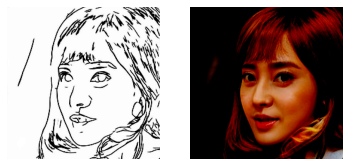

In [36]:
for idx , (sketch_img, face_img ) in enumerate(dataloader):
  print(sketch_img.shape)
  print(face_img.shape)
  plt.subplot(1,2,1)
  plt.imshow(sketch_img[4].permute(1,2,0))
  plt.axis("off")
  plt.subplot(1,2,2)
  plt.imshow(face_img[4].permute(1,2,0))
  plt.axis("off")
  break